# <font color=red>SMU DS 7331 DATA MINING - LAB 1 - RESUBMISSION</font>

**Team Members:**
- YuMei Bennett
- Liang Huang
- Ganesh Kodi
- Eric McCandless

**Changes to Notebook for Resubmission:**
- Added sub-section header to "BUSINESS UNDERSTANDING"

## <font color=blue>BUSINESS UNDERSTANDING (10 POINTS)</font>

**Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.**

We used the "adult" dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Adult).  The dataset contains 1994 Census data.  It has 48,842 records and 14 attributes. Each record represents demographic information about an individual. 

The purpose of the data set was to determine which demographic attribute had the most impact on whether or not a person's income is less than or equal to 50,000 dollars or greater than 50,000 dollars.  

A good prediction algorithm would establish a relationship or correlation between a specific attribute or group of attributes with the probability of income being <=50,000 dollars or >50,000 dollars.

## <font color=blue>DATA MEANING TYPE (10 POINTS)</font>

**Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file:**

We will take the following steps to accomplish this task:

- Read in dataset and add attribute names.  This dataset does not have attribute names in the file, but UCI lists the names on the site.  
- List the attributes and the corresponding value type.
- List basic statistics to see the min and max for any integer attributes.
- List the categories for the categorical attributes.
- Provide list of attributes with meaning, data type and values/scale.

In [1]:
#Read in dataset and add attribute names and check.
import pandas as pd
col_names = ['age', 'employ_type', 'pop_num', 'edu_level', 'edu_years', 'marital', 'occ', 'relation', 'race', 'gender', 'cap_gain', 'cap_loss', 'hours_week', 'country_orig', 'income']
df = pd.read_csv('adult.csv', names=col_names, header=None)
df.head(2)

,age,employ_type,pop_num,edu_level,edu_years,marital,occ,relation,race,gender,cap_gain,cap_loss,hours_week,country_orig,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [2]:
#List the attributes and the corresponding value type.
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age             32561 non-null int64
employ_type     32561 non-null object
pop_num         32561 non-null int64
edu_level       32561 non-null object
edu_years       32561 non-null int64
marital         32561 non-null object
occ             32561 non-null object
relation        32561 non-null object
race            32561 non-null object
gender          32561 non-null object
cap_gain        32561 non-null int64
cap_loss        32561 non-null int64
hours_week      32561 non-null int64
country_orig    32561 non-null object
income          32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [3]:
#List basic statistics to see the min and max for any integer attributes.
print (df.describe())

                age       pop_num     edu_years      cap_gain      cap_loss  \
count  32561.000000  3.256100e+04  32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05     10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05      2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04      1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05      9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05     10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05     12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06     16.000000  99999.000000   4356.000000   

         hours_week  
count  32561.000000  
mean      40.437456  
std       12.347429  
min        1.000000  
25%       40.000000  
50%       40.000000  
75%       45.000000  
max       99.000000  


In [4]:
#List the categories for the categorical attributes.
print (df['employ_type'].value_counts())
print (df['edu_level'].value_counts())
print (df['marital'].value_counts())
print (df['occ'].value_counts())
print (df['relation'].value_counts())
print (df['race'].value_counts())
print (df['gender'].value_counts())
print (df['country_orig'].value_counts())
print (df['income'].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: employ_type, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: edu_level, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial     

**Based on the analysis above and source material, here is the list of attributes with data type and values/scale.**


| Attribute    | Data Type | Description                                                          | Values/Scale                                                                                                                                                                                                                                                                                                                                                                                                                             |   |
|--------------|-----------|----------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-:|
| age          | integer   | Age                                                                  | 17 - 90                                                                                                                                                                                                                                                                                                                                                                                                                                  |   |
| employ_type  | nominal   | Type of employment                                                   | Private, Self­-emp­-not-­inc, Self-­emp-­inc, Federal­-gov, Local­-gov, State-­gov, Without-pay, Never-worked, ?                                                                                                                                                                                                                                                                                                                            |   |
| pop_num      | integer   | # of people the Census believes the entry represents                 | 12,285 - 1,484,705                                                                                                                                                                                                                                                                                                                                                                                                                       |   |
| edu_level    | nominal   | Education level                                                      | Preschool, 1st-4th, 5th-6th, 7th-8th, 9th, 10th, 11th, 12th, HS-grad, Prof-school, Some­-college, Assoc­-acdm, Assoc­-voc, Bachelors, Masters, Doctorate                                                                                                                                                                                                                                                                                 |   |
| edu_years    | integer   | Years of education                                                   | 1 - 16                                                                                                                                                                                                                                                                                                                                                                                                                                   |   |
| marital      | nominal   | Marital status                                                       | Married­-civ-­spouse (civilian spouse), Divorced, Never­-married, Separated, Widowed, Married­-spouse-­absent, Married­-AF­-spouse (married with spouse in Armed Forces)                                                                                                                                                                                                                                                                 |   |
| occ          | nominal   | Occupation                                                           | Tech-­support, Craft­-repair, Other-­service, Sales, Exec­-managerial, Prof­-specialty, Handlers-­cleaners, Machine­-op-­inspct, Adm­-clerical, Farming-fishing, Transport-­moving, Priv­-house-­serv, Protective­-serv, Armed­-Forces, ?                                                                                                                                                                                                  |   |
| relation     | nominal   | Represents what this individual is relative to others. e.g., husband | Husband, Not-in-family, Own-child, Unmarried, Wife, Other-relative                                                                                                                                                                                                                                                                                                                                                                       |   |
| race         | nominal   | Race                                                                 | White, Black, Asian_Pac_Islander, Amer-Indian-Eskimo, Other                                                                                                                                                                                                                                                                                                                                                                              |   |
| gender       | nominal   | Gender                                                               | Male, Female                                                                                                                                                                                                                                                                                                                                                                                                                             |   |
| cap_gain     | integer   | Capital gains (dollars)                                                        | 0 - 99,999                                                                                                                                                                                                                                                                                                                                                                                                                             |   |
| cap_loss     | integer   | Capital loss (dollars)                                                        | 0 - 4,356                                                                                                                                                                                                                                                                                                                                                                                                                              |   |
| hours_week   | integer   | Hours worked per week                                                | 1 - 99                                                                                                                                                                                                                                                                                                                                                                                                                                   |   |
| country_orig | nominal   | Native country                                                       | United­-States, Cambodia, England, Puerto-­Rico, Canada, Germany, Outlying­-US(Guam­-US-VI-­etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican­-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El­-Salvador, Trinadad&Tobago, Peru, Hong, Holand­-Netherlands, ? |   |
| income       | nominal   | Income level (dollars)                                                         | <=50K, >50K                                                                                                                                                                                                                                                                                                                                                                                                                            |   |





## <font color=blue>DATA QUALITY (15 POINTS)</font>

**Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these 
problems? Give justifications for your methods.**


_Missing Values_

From the analysis conducted above, we discovered that the following 3 categorical attributes have missing data points:

- employ_type (Type of employment) - 1,836 missing data points (5.6% of records)
- occ (Occupation) - 1,843 missing data points (5.7% or records)
- country_orig (Native country) - 583 missing data points (1.8% of records)

We are not intimately familiar with the data set and are unable to determine if these missing data points are Missing at Random (MAR), Missing Completely at Random (MCAR) or Missing Not at Random (MNAR).  For this reason, we feel that it would be risky to remove the missing records associated with the data points.  Additionally, we would like have as much data as possible.  Therefore, we chose to create new "Other_cat" category for missing values within each of these attributes and keep in the analysis at this point.

Additionally, we discovered that there are no missing values for the integer variables, however, there are several "0" values within the capital gains and capital loss attributes.  At first, we treated these "0" values as missing values and imputed a mean.  But, after a team discussion we decided to leave the "0" values as is because there we assume there could be cases where there could be 0 capital gains and 0 capital losses.  We will keep the "0" values in the analysis at this point.

In [5]:
#Replace "?" with "Other_cat"
df['employ_type'] = df['employ_type'].str.replace('?','Other_cat')
df['occ'] = df['occ'].str.replace('?','Other_cat')
df['country_orig'] = df['country_orig'].str.replace('?','Other_cat')

_Outliers_

We checked for outliers for the integer atributes using boxplots.  The boxplots show evidence of several outliers for each attribute.  This was confirmed by determinng the number of outliers via IQR.  We again are hesitant to remove values even if they are outliers at this stage.  However, we decided to do further analysis on the hours_week (hours worked per week) attribute as this attribute has the most outliers.  We checked to see how the outliers distributed across the occ (occupation) attribute as this could help us better understand where the outliers were falling and if it made sense.  We found that the upper outliers were most likely in Exec-managerial (734), Prof-specialty (580), and Sales (520).  The lower value outliers were most likely in Other-service (1221), Other_cat (817), Sales (775), Adm-clerical (685).  This makes sense to us as execs and specialty occupations can be expected to work more hours than what is typical.  Adversely, Adm-clerical is more of an hourly occupation and therfore probably means less hours.  Other-service and Other_cat occupations are difficult to assess, so there is not enough evidence for this being an anomaly.  It also makes sense that Sales could have many or few hours worked per week.  Therefore, we will not remove these outliers for now.  

In [6]:
#Check for outliers in integer attributes using boxplots.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
vars_to_plot_separate = [['age'], 
                         ['pop_num'], 
                         ['edu_years'], 
                         ['cap_gain'], 
                         ['cap_loss'], 
                         ['hours_week']]
plt.figure(figsize=(10,6))

for index, plot_vars in enumerate(vars_to_plot_separate):
    plt.subplot(len(vars_to_plot_separate)/2, 
                3,
                index+1)
    ax=df.boxplot(column=plot_vars)
plt.show()


<Figure size 1000x600 with 6 Axes>

In [7]:
#Number of outliers for age according IQR method.
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
((df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR))).sum()

143

In [8]:
#Number of outliers for pop_num according IQR method.
Q1 = df['pop_num'].quantile(0.25)
Q3 = df['pop_num'].quantile(0.75)
IQR = Q3 - Q1
((df['pop_num'] < (Q1 - 1.5 * IQR)) | (df['pop_num'] > (Q3 + 1.5 * IQR))).sum()

992

In [9]:
#Number of outliers for cap_gain according IQR method.
Q1 = df['cap_gain'].quantile(0.25)
Q3 = df['cap_gain'].quantile(0.75)
IQR = Q3 - Q1
((df['cap_gain'] < (Q1 - 1.5 * IQR)) | (df['cap_gain'] > (Q3 + 1.5 * IQR))).sum()

2712

In [10]:
#Number of outliers for cap_loss according IQR method.
Q1 = df['cap_loss'].quantile(0.25)
Q3 = df['cap_loss'].quantile(0.75)
IQR = Q3 - Q1
((df['cap_loss'] < (Q1 - 1.5 * IQR)) | (df['cap_loss'] > (Q3 + 1.5 * IQR))).sum()

1519

In [11]:
#Number of outliers for edu_years according IQR method.
Q1 = df['edu_years'].quantile(0.25)
Q3 = df['edu_years'].quantile(0.75)
IQR = Q3 - Q1
((df['edu_years'] < (Q1 - 1.5 * IQR)) | (df['edu_years'] > (Q3 + 1.5 * IQR))).sum()

1198

In [12]:
#Number of outliers for hours_week according IQR method.
Q1 = df['hours_week'].quantile(0.25)
Q3 = df['hours_week'].quantile(0.75)
IQR = Q3 - Q1
((df['hours_week'] < (Q1 - 1.5 * IQR)) | (df['hours_week'] > (Q3 + 1.5 * IQR))).sum()

9008

In [13]:
#Distribution of high-value outliers for hours per week worked by occupation.
df['outlier'] = ((df['hours_week'] > (Q3 + 1.5 * IQR)))
df_high_outlier = df[df['outlier']==True]
print (df_high_outlier['occ'].value_counts())

 Exec-managerial      734
 Prof-specialty       580
 Sales                520
 Craft-repair         378
 Transport-moving     301
 Farming-fishing      289
 Other-service        161
 Adm-clerical         124
 Protective-serv       97
 Other_cat             89
 Machine-op-inspct     88
 Handlers-cleaners     66
 Tech-support          55
 Priv-house-serv        9
 Armed-Forces           1
Name: occ, dtype: int64


In [14]:
#Distribution of low-value outliers for hours per week worked by occupation.
df['outlier'] = ((df['hours_week'] < (Q1 - 1.5 * IQR)))
df_low_outlier = df[df['outlier']==True]
print (df_low_outlier['occ'].value_counts())

 Other-service        1221
 Other_cat             817
 Sales                 775
 Adm-clerical          685
 Prof-specialty        514
 Handlers-cleaners     290
 Exec-managerial       261
 Craft-repair          245
 Transport-moving      150
 Machine-op-inspct     144
 Farming-fishing       142
 Tech-support          136
 Priv-house-serv        73
 Protective-serv        62
 Armed-Forces            1
Name: occ, dtype: int64


_Duplicate Data_

We found 24 duplicate records in the dataset.  We will not remove these records as these are individuals and duplicate characteristics are possible.

In [15]:
# Find duplicate rows in dataframe and count.
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)
len(df)-len(df.drop_duplicates())


Duplicate Rows except first occurrence based on all columns are :
       age        employ_type  pop_num      edu_level  edu_years  \
4881    25            Private   308144      Bachelors         13   
5104    90            Private    52386   Some-college         10   
9171    21            Private   250051   Some-college         10   
11631   20            Private   107658   Some-college         10   
13084   25            Private   195994        1st-4th          2   
15059   21            Private   243368      Preschool          1   
17040   46            Private   173243        HS-grad          9   
18555   30            Private   144593        HS-grad          9   
18698   19            Private    97261        HS-grad          9   
21318   19            Private   138153   Some-college         10   
21490   19            Private   146679   Some-college         10   
21875   49            Private    31267        7th-8th          4   
22300   25            Private   195994        1st-

24

## <font color=blue>SIMPLE STATISTICS (10 POINTS)</font>

#### Continous feature analysis
As part of the analysis, we have segregated continous features and categorical features seperately. We are planning to find the stattistics and relation between both types of variables


In [16]:
# Basic Statistics of the dataset

df_continous = df.loc[:, ['age','pop_num','edu_years','hours_week','cap_gain','cap_loss']] 


print("-----------------Mean--------------------------")
print(df_continous.mean())
print("-----------------------------------------------")
print("-----------------Variance----------------------")
print(df_continous.std())
print("-----------------------------------------------")
print("-----------------Median------------------------")
print(df_continous.median())
print("-----------------------------------------------")
print("-----------------Max---------------------------")
print(df_continous.max())
print("-----------------------------------------------")
print("-----------------Min---------------------------")
print(df_continous.min())
print("-----------------------------------------------")
print("-----------------Range-------------------------")
print(df_continous.max()-df_continous.min())
print("-----------------------------------------------")
print("-----------------Count------------------------")
#for col in df_continous.columns:
print(df_continous.count())
print("-----------------------------------------------")


-----------------Mean--------------------------
age               38.581647
pop_num       189778.366512
edu_years         10.080679
hours_week        40.437456
cap_gain        1077.648844
cap_loss          87.303830
dtype: float64
-----------------------------------------------
-----------------Variance----------------------
age               13.640433
pop_num       105549.977697
edu_years          2.572720
hours_week        12.347429
cap_gain        7385.292085
cap_loss         402.960219
dtype: float64
-----------------------------------------------
-----------------Median------------------------
age               37.0
pop_num       178356.0
edu_years         10.0
hours_week        40.0
cap_gain           0.0
cap_loss           0.0
dtype: float64
-----------------------------------------------
-----------------Max---------------------------
age                90
pop_num       1484705
edu_years          16
hours_week         99
cap_gain        99999
cap_loss         4356
dtype: int64


In [17]:
# standard statistics for the numeric variables
df_continous.describe()

,age,pop_num,edu_years,hours_week,cap_gain,cap_loss
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,40.437456,1077.648844,87.303830
std,13.640433,1.055500e+05,2.572720,12.347429,7385.292085,402.960219
min,17.000000,1.228500e+04,1.000000,1.000000,0.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,40.000000,0.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,40.000000,0.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,45.000000,0.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99.000000,99999.000000,4356.000000


The table above shows the simple statistics for the numeric values in the table.

Average age of the population taken for the analysis is having 38.58 with education year as 10 years and average working weekly hours of 40. Though capital gain and capital loss 1077 and 87 respectively, due to huge number of zeroes (we have rejected those as outliers due to possibility of zero loss or gain in the capital), statistics for these variables are questionable. Huge range for capital gains and capital loss shows there is large in equality in the income of the population.
Missing values and outliers are described in previous sections


## <font color=blue>VISUALIZE ATTRIBUTES (15 POINTS)</font>

**Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.**

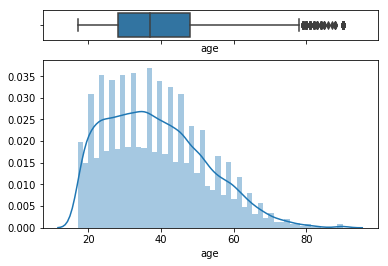

In [18]:
# Check the distribution of Age
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_continous["age"], ax=ax_box)
sns.distplot(df_continous["age"], ax=ax_hist)


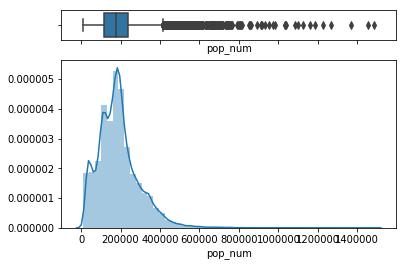

In [19]:
# Check the distribution of Population number
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_continous["pop_num"], ax=ax_box)
sns.distplot(df_continous["pop_num"], ax=ax_hist)


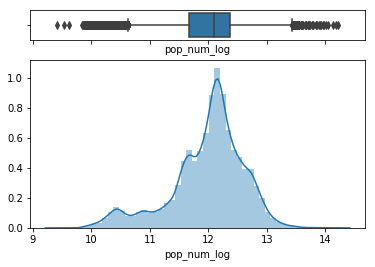

In [20]:
# Check the distribution of Population number after log transformation
df_continous["pop_num_log"] = np.log(df_continous["pop_num"])
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_continous["pop_num_log"], ax=ax_box)
sns.distplot(df_continous["pop_num_log"], ax=ax_hist)


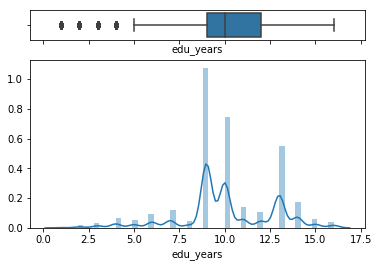

In [21]:
# Check the distribution of Education Years
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_continous["edu_years"], ax=ax_box)
sns.distplot(df_continous["edu_years"], ax=ax_hist)


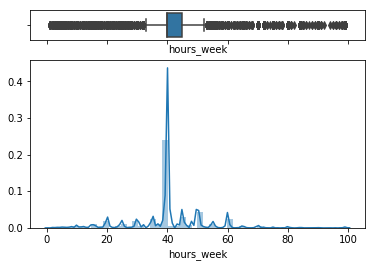

In [22]:
# Check the distribution of Hours of week
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_continous["hours_week"], ax=ax_box)
sns.distplot(df_continous["hours_week"], ax=ax_hist)


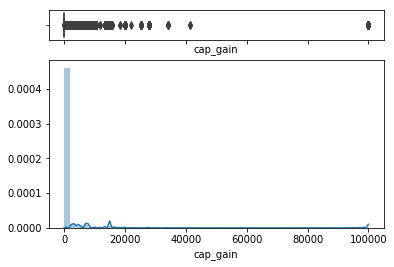

In [23]:
# Check the distribution of Capital gain
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_continous["cap_gain"], ax=ax_box)
sns.distplot(df_continous["cap_gain"], ax=ax_hist)


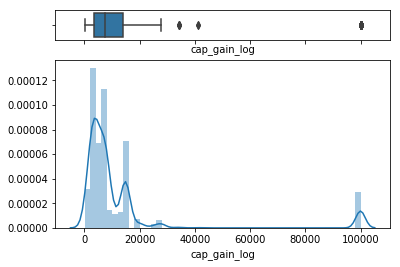

In [24]:
# Check the distribution of Capital gain after removal of zeroes and log transformation
df_continous["cap_gain_log"] = df_continous["cap_gain"].replace(0,np.nan)
df_continous_1 = df_continous.dropna()
df_continous["cap_gain_log"] = np.log(df_continous["cap_gain_log"])

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_continous_1["cap_gain_log"], ax=ax_box)
sns.distplot(df_continous_1["cap_gain_log"], ax=ax_hist)

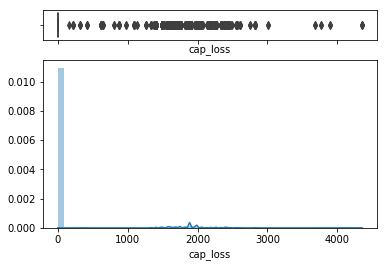

In [25]:
# Check the distribution of Capital loss
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_continous["cap_loss"], ax=ax_box)
sns.distplot(df_continous["cap_loss"], ax=ax_hist)

We have plotted above to understand the distribution of the numeric features.
Based on the visualization, age is some what normally distributed. 
Population number is right skewed and we have decided to log transform the pop_num and it worked out to be normally distributed after transformation. 
Variable edu_years looks like normally distributed. Also we are seeing standardization on ranges of values.
cap_gain and cap_loss are not normally distibuted due to huge number of zeroes. Though we removed the zeroes and validated standard distribution after that, we are continuing with zeroes as mentioned above (in outlier section).

#### Categorical features
We have segregated categorical value to different subset for analysis. Particularly to find the relation ship between the variables

In [26]:
# Categorical variable dataset 
df_category = df.loc[:, ['employ_type','edu_level','marital','occ','relation','race','gender', 'country_orig', 'income']] 

df_with_cat_code = df_category.copy()

# Categorical variable dataset transformed to numeric values
df_with_cat_code.columns = ['employ_type_code','edu_level_code','marital_code','occ_code','relation_code','race_code','gender_code', 'country_orig_code', 'income_code']

df_with_cat_code = df_with_cat_code.replace(to_replace=' State-gov',value=1)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Self-emp-not-inc',value=2)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Private',value=3)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Federal-gov',value=4)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Local-gov',value=5)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Self-emp-inc',value=6)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Without-pay',value=7)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Never-worked',value=8)
df_with_cat_code["employ_type_code"] = df_with_cat_code["employ_type_code"].replace(' Other_cat',value=9)

df_with_cat_code = df_with_cat_code.replace(to_replace=' Bachelors',value=14)
df_with_cat_code = df_with_cat_code.replace(to_replace=' HS-grad',value=10)
df_with_cat_code = df_with_cat_code.replace(to_replace=' 11th',value=8)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Masters',value=16)
df_with_cat_code = df_with_cat_code.replace(to_replace=' 9th',value=6)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Some-college',value=11)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Assoc-acdm',value=13)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Assoc-voc',value=12)
df_with_cat_code = df_with_cat_code.replace(to_replace=' 7th-8th',value=4)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Doctorate',value=17)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Prof-school',value=15)
df_with_cat_code = df_with_cat_code.replace(to_replace=' 5th-6th',value=3)
df_with_cat_code = df_with_cat_code.replace(to_replace=' 10th',value=7)
df_with_cat_code = df_with_cat_code.replace(to_replace=' 1st-4th',value=2)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Preschool',value=1)
df_with_cat_code = df_with_cat_code.replace(to_replace=' 12th',value=9)

df_with_cat_code = df_with_cat_code.replace(to_replace=' Never-married',value=1)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Married-civ-spouse',value=2)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Divorced',value=3)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Married-spouse-absent',value=4)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Separated',value=5)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Married-AF-spouse',value=6)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Widowed',value=7)
df_with_cat_code["occ_code"] = df_with_cat_code["occ_code"].replace(' Other_cat',value=8)

df_with_cat_code = df_with_cat_code.replace(to_replace=' Adm-clerical',value=1)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Exec-managerial',value=2)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Handlers-cleaners',value=3)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Prof-specialty',value=4)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Other-service',value=5)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Sales',value=6)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Craft-repair',value=7)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Transport-moving',value=8)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Farming-fishing',value=9)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Machine-op-inspct',value=10)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Tech-support',value=11)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Protective-serv',value=12)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Armed-Forces',value=13)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Priv-house-serv',value=14)

df_with_cat_code = df_with_cat_code.replace(to_replace=' Not-in-family',value=1)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Husband',value=2)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Wife',value=3)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Own-child',value=4)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Unmarried',value=5)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Other-relative',value=6)

df_with_cat_code = df_with_cat_code.replace(to_replace=' White',value=1)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Black',value=2)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Asian-Pac-Islander',value=3)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Amer-Indian-Eskimo',value=4)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Other',value=5)

df_with_cat_code = df_with_cat_code.replace(to_replace=' Male',value=0)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Female',value=1)

df_with_cat_code = df_with_cat_code.replace(to_replace=' United-States',value=1)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Cuba',value=2)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Jamaica',value=3)
df_with_cat_code = df_with_cat_code.replace(to_replace=' India',value=4)
df_with_cat_code = df_with_cat_code.replace(to_replace=' ?',value=5)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Mexico',value=6)
df_with_cat_code = df_with_cat_code.replace(to_replace=' South',value=7)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Puerto-Rico',value=8)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Honduras',value=9)
df_with_cat_code = df_with_cat_code.replace(to_replace=' England',value=10)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Canada',value=11)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Germany',value=12)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Iran',value=13)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Philippines',value=14)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Italy',value=15)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Poland',value=16)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Columbia',value=17)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Cambodia',value=18)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Thailand',value=19)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Ecuador',value=10)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Laos',value=21)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Taiwan',value=22)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Haiti',value=23)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Portugal',value=24)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Dominican-Republic',value=25)
df_with_cat_code = df_with_cat_code.replace(to_replace=' El-Salvador',value=26)
df_with_cat_code = df_with_cat_code.replace(to_replace=' France',value=27)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Guatemala',value=28)
df_with_cat_code = df_with_cat_code.replace(to_replace=' China',value=29)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Japan',value=30)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Yugoslavia',value=31)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Peru',value=32)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Outlying-US(Guam-USVI-etc)',value=33)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Scotland',value=34)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Trinadad&Tobago',value=35)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Greece',value=36)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Nicaragua',value=37)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Vietnam',value=38)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Hong',value=39)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Ireland',value=40)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Hungary',value=41)
df_with_cat_code = df_with_cat_code.replace(to_replace=' Holand-Netherlands',value=42)
df_with_cat_code["country_orig_code"] = df_with_cat_code["country_orig_code"].replace(' Other_cat',value=43)

df_with_cat_code = df_with_cat_code.replace(to_replace=' <=50K',value=0)
df_with_cat_code = df_with_cat_code.replace(to_replace=' >50K',value=1)

In [27]:
# Joining both caterogrical dataset and numeric converted categorical variables
df_category_com = pd.concat([df_category, df_with_cat_code],axis=1)



### Relation between the features
##### Continous feature relation

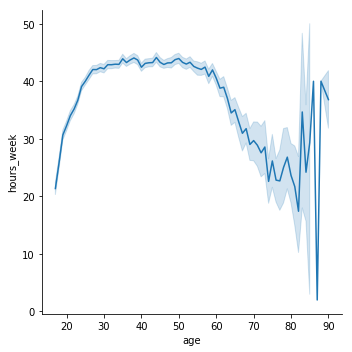

In [28]:
# Check relation between Age and Hours of week
age_vs_hours_per_week = sns.relplot(x="age", y="hours_week", kind="line", data=df_continous)

We had plotted graph to find out the relation between Age and Hours of week. As seen above average weekly hours is started less for the age below 20 and peaked between age of 25-50 to 42.5 hrs/week. It slides to low level post 60. 

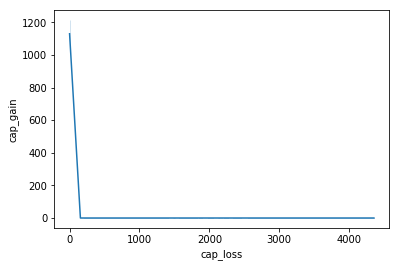

In [29]:
# Check the relation between Capital gain and Capital loss
sns.lineplot(x='cap_loss',y='cap_gain',data=df_continous)

Based on the capital gain and capital loss graph we see huge number of zeroes and we couldnt conclude much on the relation

##### Categorical feature relation

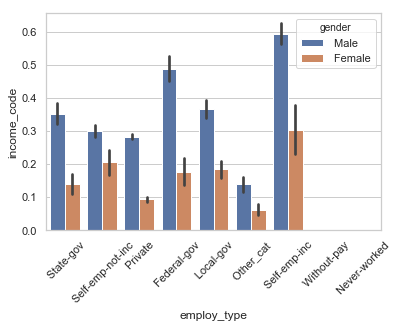

In [30]:

# Compare gender income among different employment type
sns.set(style="whitegrid")
ax=sns.barplot(x="employ_type",y="income_code", hue="gender", data=df_category_com)
plt.xticks(rotation=45)
plt.show()


Above plot shows that female work force participation is almost half of the male participation across all type of employment. 

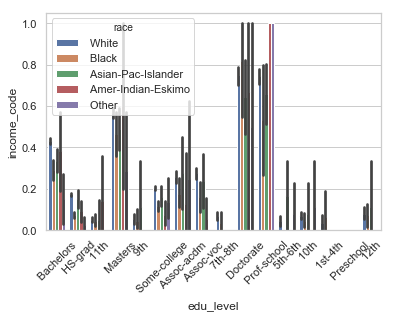

In [31]:

# Compare gender income among different education level
sns.set(style="whitegrid")
ax=sns.barplot(x="edu_level",y="income_code", hue="race", data=df_category_com)
plt.xticks(rotation=45)
plt.show()


Above plot shows that higher the education level higher the number for the income.  

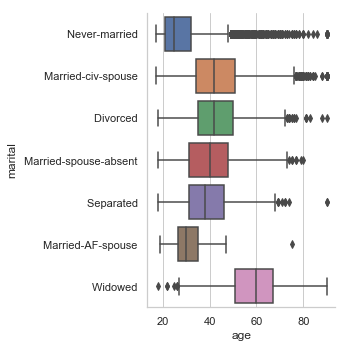

In [32]:
sns.catplot(x="age",y="marital",kind='box',data=df)

Above plot clearly shows the distribution age against marital status. Based on the plot, Average age of widow is around 60s and Never married status is early 20s. 

##### Matrix relation
We have plotted matrix plot for relation between variables. To differentiate further we had color coded the distribution with income level. 
Scatter plot below shows the relation between age and capital gain and hours of week. It shows that more number of entries for higher income when education level increases and hours of week increases.

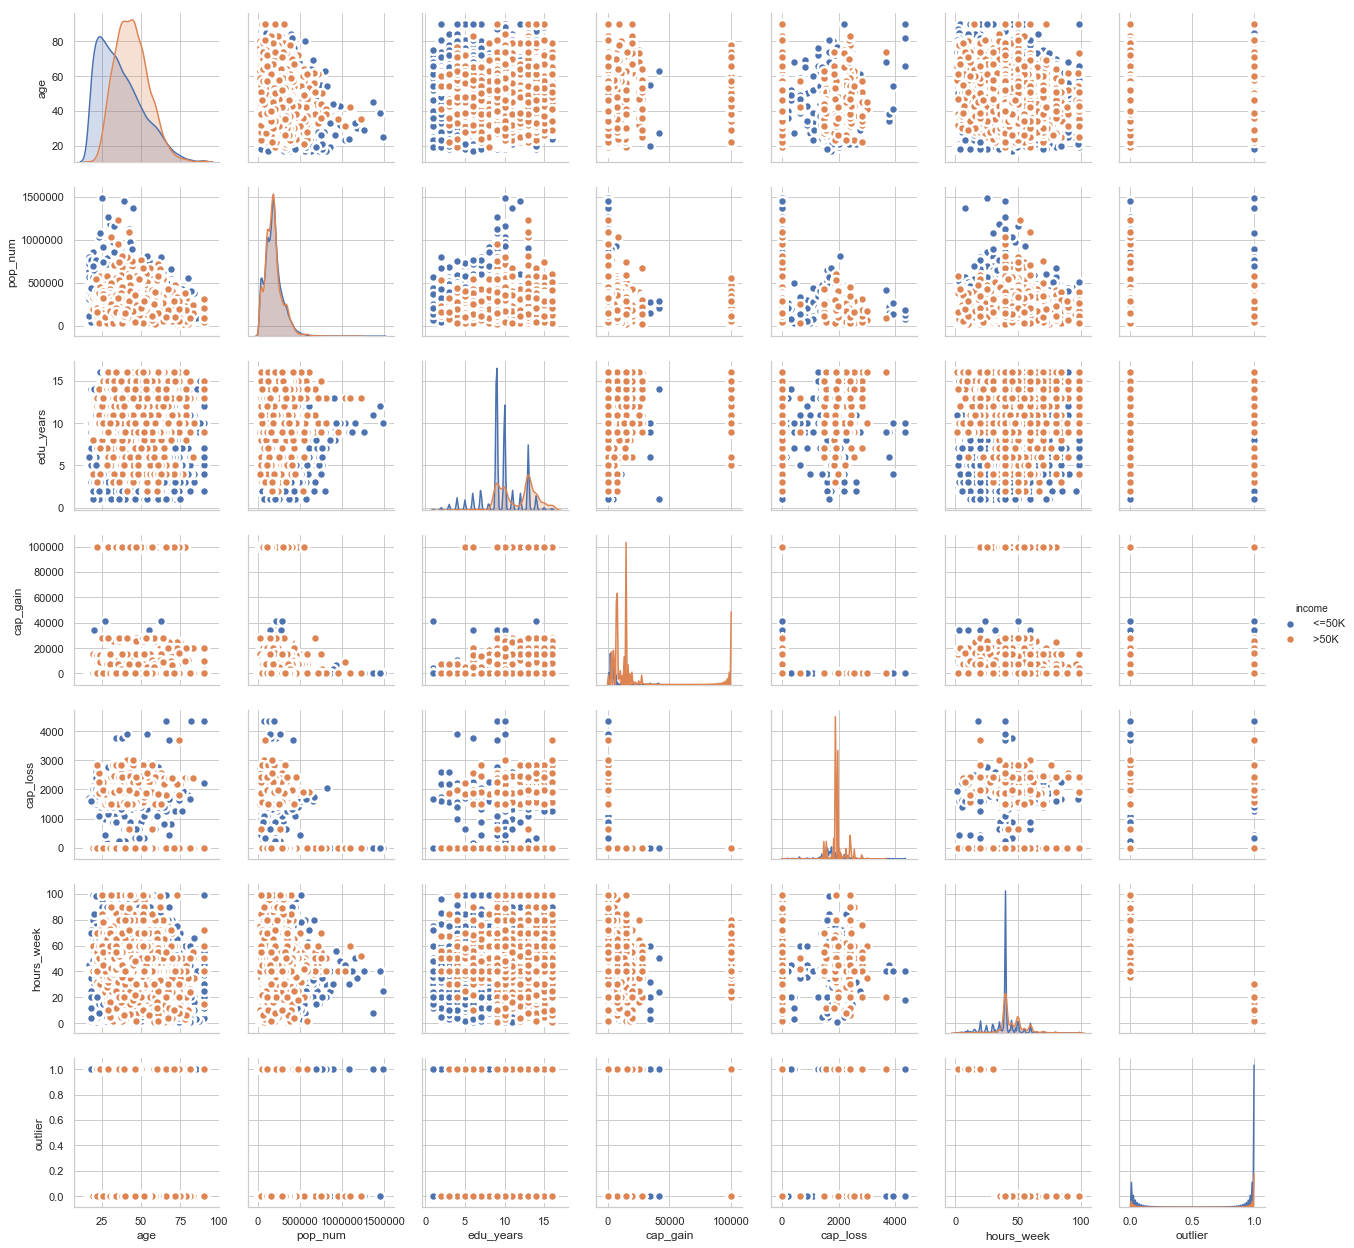

In [33]:
# Scatter matrix plot without regression
sns.pairplot(df, kind="scatter", hue="income", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

## <font color=blue>EXPLORE JOINT ATTRIBUTES (15 POINTS)</font>

**Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.**

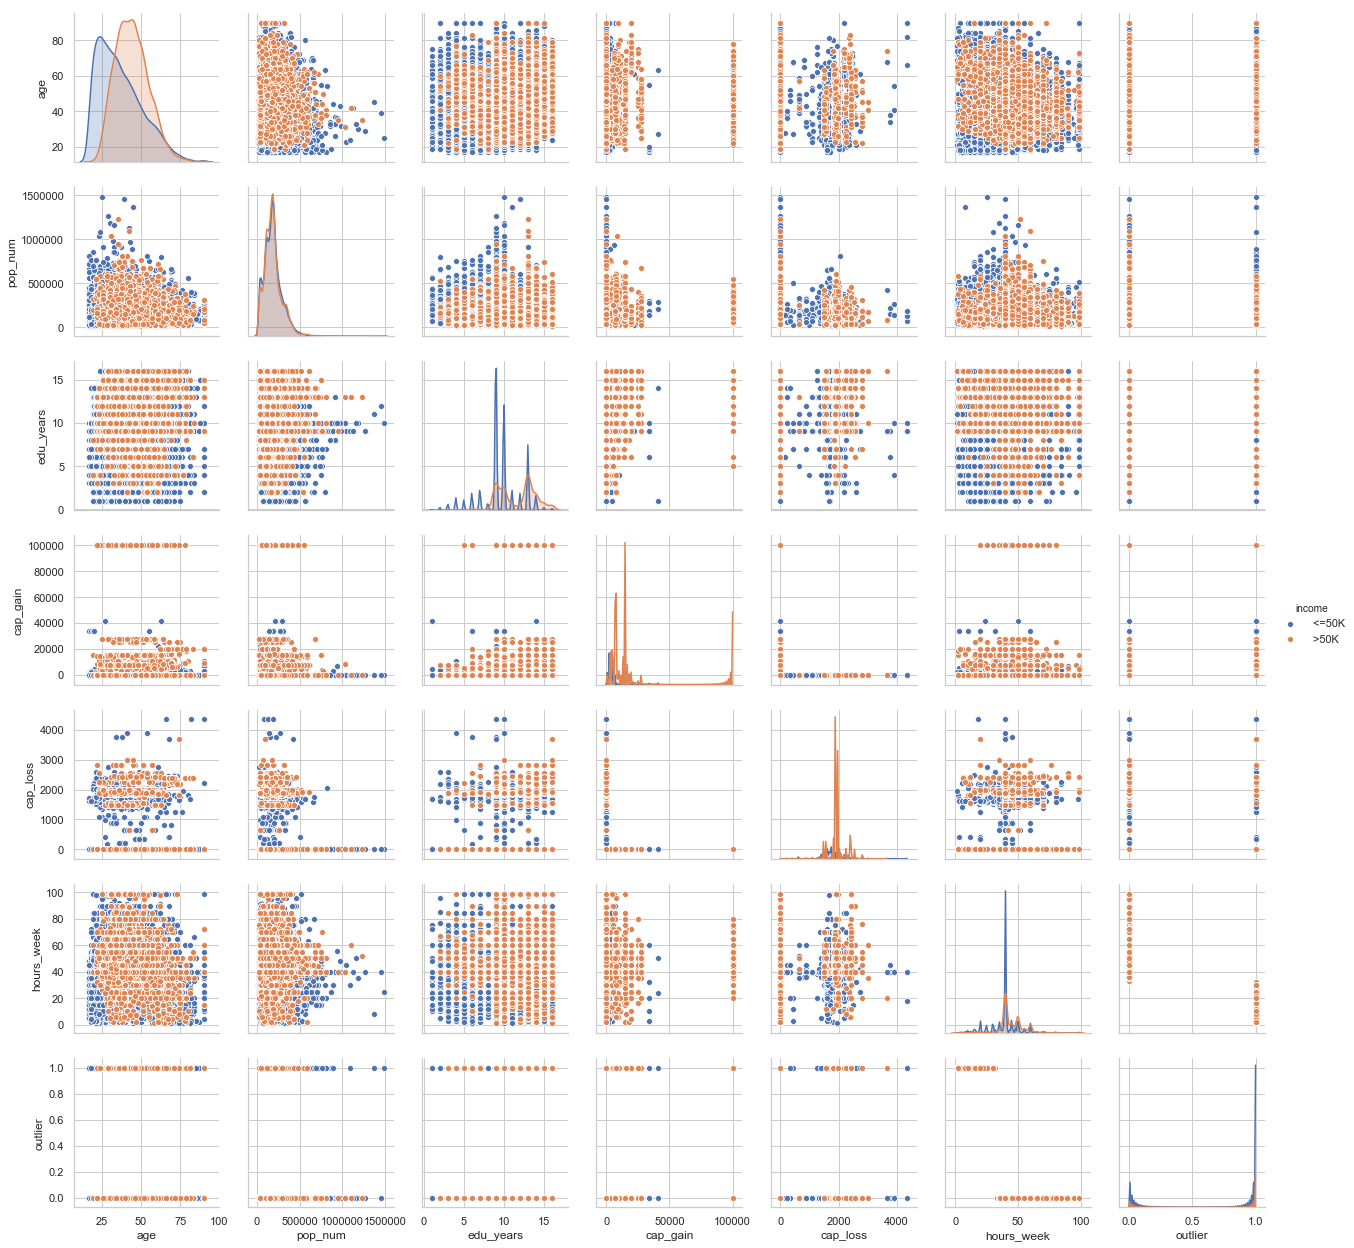

In [34]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

sns.pairplot(df, kind="scatter",hue="income")
plt.show()

#lower edu_years has more lower income people
#lower income has lower cap_loss
#lower income has less cap_gain


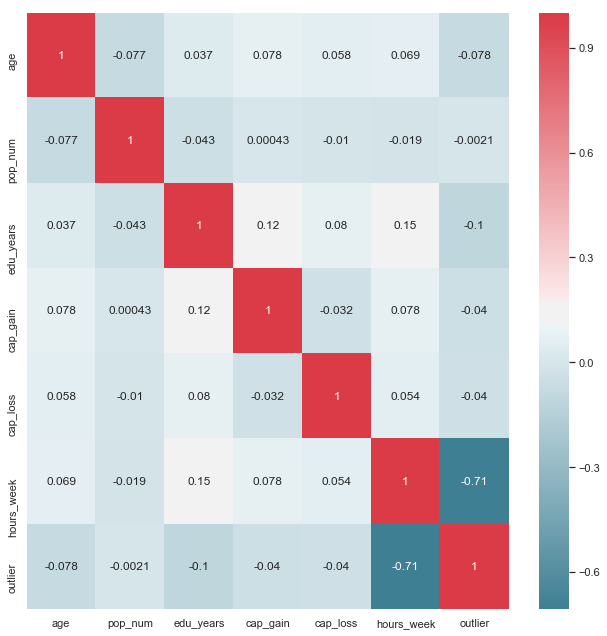

In [35]:
# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df.corr(), cmap=cmap, annot=True, ax=ax)

f.tight_layout()

Above correlation matrix shows correlation between hours_week and edu_years and correlation between cap_gain and edu_years.

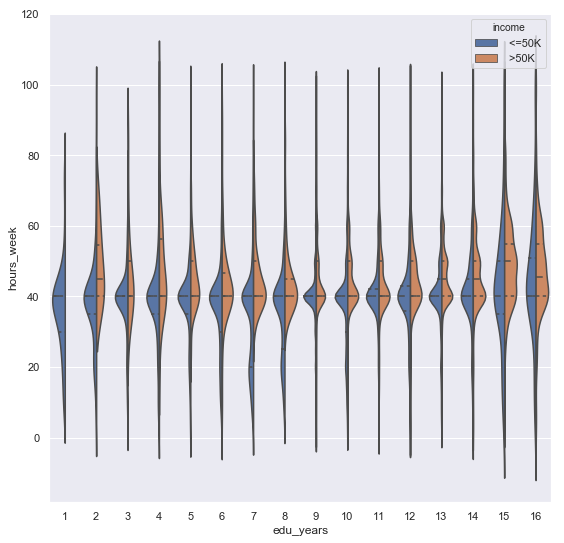

In [36]:
f, ax = plt.subplots(figsize=(9, 9))

sns.violinplot(x="edu_years", y="hours_week", hue="income", data=df, 
               split=True, inner="quart")

Above violin plot shows the following
- Higher edu_years has more income and tend to have more working hours_week
- lower edu_years also has higher wroking hours_week, but has flatter leaf of income compare to higher edu_years

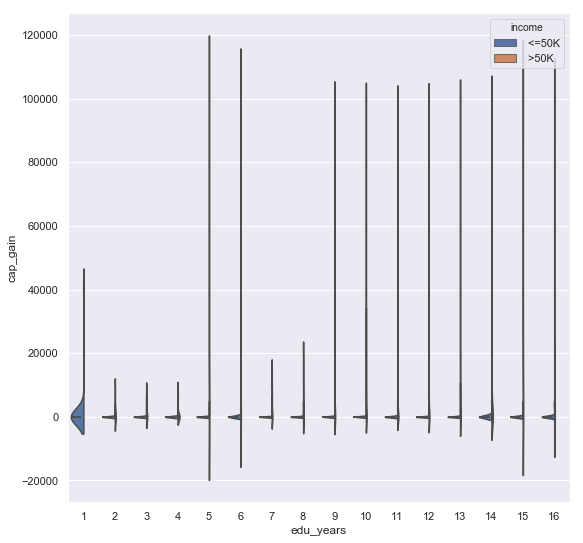

In [37]:
f, ax = plt.subplots(figsize=(9, 9))

sns.violinplot(x="edu_years", y="cap_gain", hue="income", data=df, 
               split=True, inner="quart")

Above violin plot shows higher edu_years(9+ years) tend to have more cap_gain than lower edu_years(<9 years).

C:\Users\emccandless\AppData\Local\Continuum\anaconda3_1\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\emccandless\AppData\Local\Continuum\anaconda3_1\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


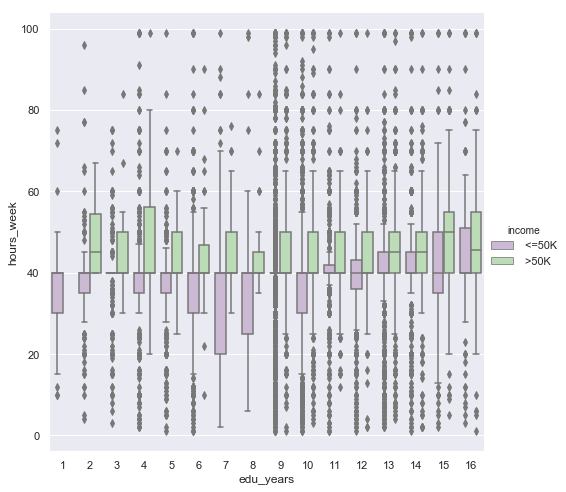

In [38]:
# this generic plotting for categorically grouped data
sns.factorplot(y='hours_week',x='edu_years',hue='income',data=df, 
               kind='box', # other options: violin, bar, box, and others 
               palette='PRGn',
               size=7,ci=95)

Above factor plot shows higher edu_years has more working hours_week.

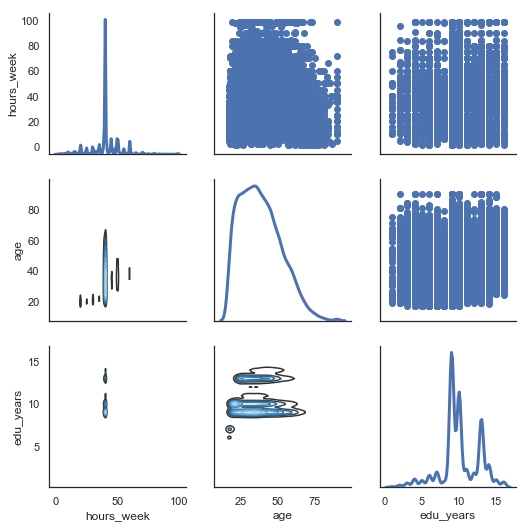

In [39]:
sns.set(style="white")

# create a plot grid
g = sns.PairGrid(df[['hours_week','age','edu_years']], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d") # use joint kde on the lower triangle
g.map_upper(plt.scatter) # scatter on the upper
g.map_diag(sns.kdeplot, lw=3) # kde histogram on the diagonal

# correlation between hours_week and edu_years

## <font color=blue>EXPLORE ATTRIBUTES AND CLASS (10 POINTS)</font>

Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

C:\Users\emccandless\AppData\Local\Continuum\anaconda3_1\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\emccandless\AppData\Local\Continuum\anaconda3_1\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\emccandless\AppData\Local\Continuum\anaconda3_1\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\emccandless\AppData\Local\Continuum\anaconda3_1\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:513: RuntimeWarn

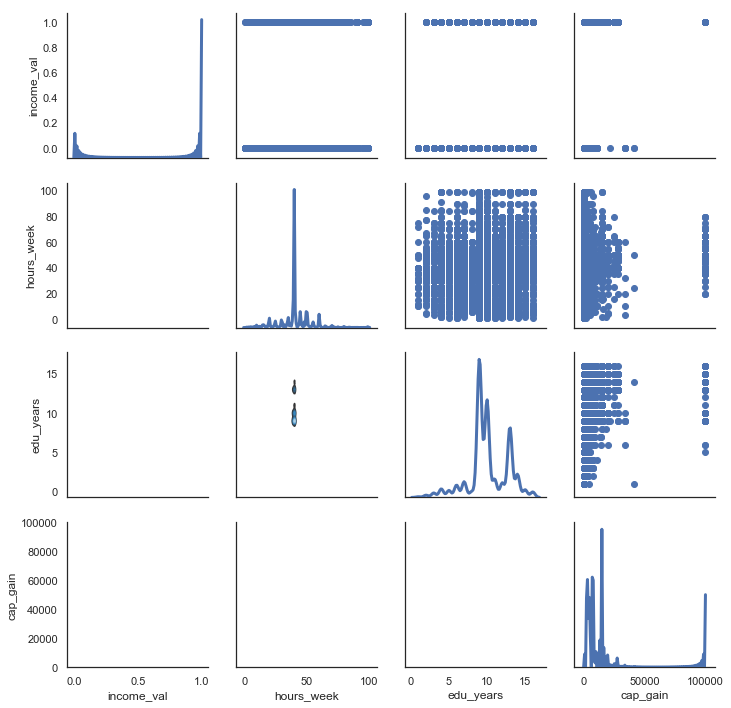

In [40]:
# visualization shows high income is corelated with high edu_years , more hours_week and more cap_gain. 
import seaborn as sns

sns.set(style="white")
df_sub = df[['cap_gain','hours_week','edu_years']]
df_sub['income_val']=pd.Categorical(df['income']).codes
# create a plot grid
g = sns.PairGrid(df_sub[['income_val','hours_week','edu_years','cap_gain']], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d") # use joint kde on the lower triangle
g.map_upper(plt.scatter) # scatter on the upper
g.map_diag(sns.kdeplot, lw=3) # kde histogram on the diagonal


## <font color=blue>NEW FEATURES (5 POINTS)</font>

**Are there other features that could be added to the data or created from existing features? Which ones?**

Education_years and education_level are directly correlated. We can verify the correlation, maybe simply drop the edu_levels?cap_gain and cap_loss can be mathmatically concatenated into a single feature cap_gain_loss = cap_gain - cap_loss.

In [41]:
# make a copy of df before apply further munipulation
dfYB0=df
print (dfYB0.info())
# import all necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Imputer
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
age             32561 non-null int64
employ_type     32561 non-null object
pop_num         32561 non-null int64
edu_level       32561 non-null object
edu_years       32561 non-null int64
marital         32561 non-null object
occ             32561 non-null object
relation        32561 non-null object
race            32561 non-null object
gender          32561 non-null object
cap_gain        32561 non-null int64
cap_loss        32561 non-null int64
hours_week      32561 non-null int64
country_orig    32561 non-null object
income          32561 non-null object
outlier         32561 non-null bool
dtypes: bool(1), int64(6), object(9)
memory usage: 3.8+ MB
None


In [42]:
#transform education_level into multiple columns with 0 and 1
# use pd.concat to join the new columns with original dataframe
df_YB2 = pd.concat([dfYB0,pd.get_dummies(df['edu_level'], prefix='edu')],axis=1)

# now drop the original 'edu_level' column (you don't need it anymore)
df_YB2.drop(['edu_level'],axis=1, inplace=True)
df_YB2.head(2)

,age,employ_type,pop_num,edu_years,marital,occ,relation,race,gender,cap_gain,...,edu_ 9th,edu_ Assoc-acdm,edu_ Assoc-voc,edu_ Bachelors,edu_ Doctorate,edu_ HS-grad,edu_ Masters,edu_ Preschool,edu_ Prof-school,edu_ Some-college
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,0,0,0,1,0,0,0,0,0,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,0,0,0,1,0,0,0,0,0,0


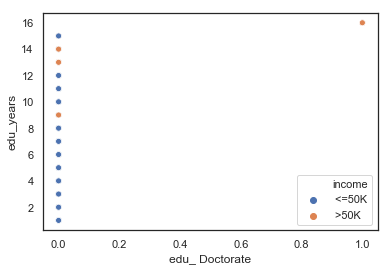

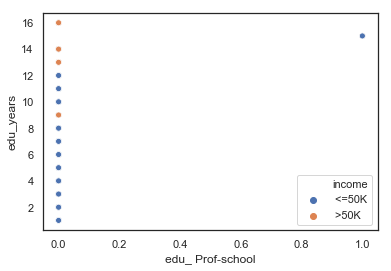

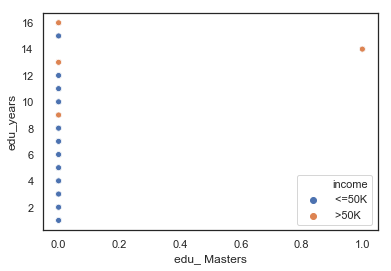

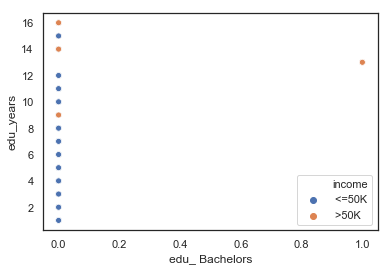

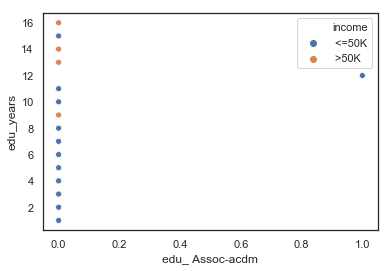

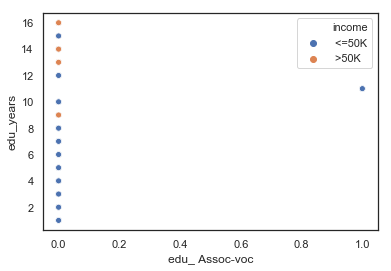

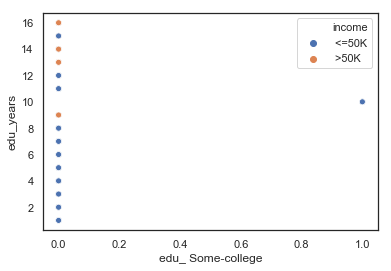

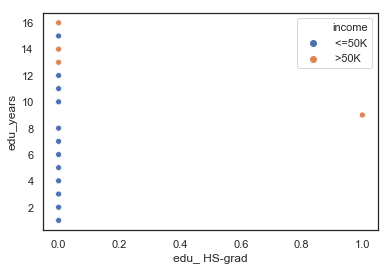

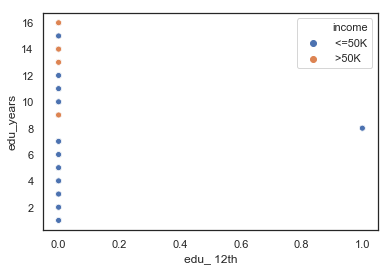

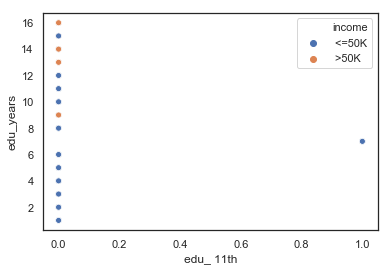

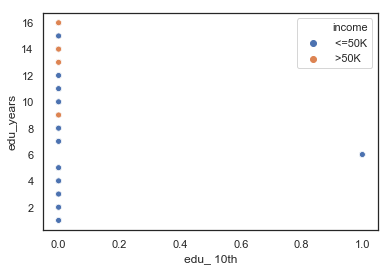

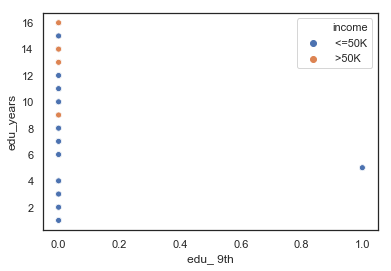

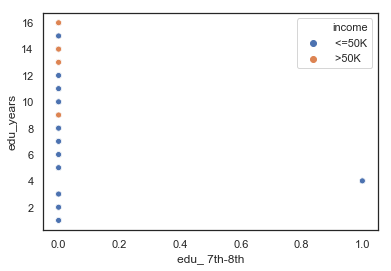

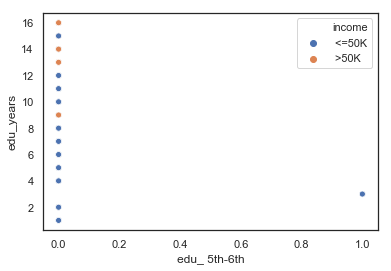

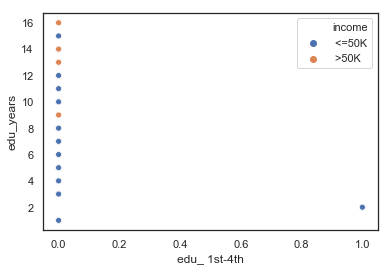

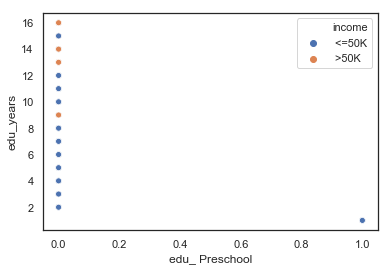

In [43]:
# visualize scatter plot edu_years and edu_level

sns.scatterplot(x="edu_ Doctorate", y="edu_years", hue="income", data=df_YB2)
plt.show()

sns.scatterplot(x="edu_ Prof-school", y="edu_years", hue="income", data=df_YB2)
plt.show()

sns.scatterplot(x="edu_ Masters", y="edu_years", hue="income", data=df_YB2)
plt.show()

sns.scatterplot(x="edu_ Bachelors", y="edu_years", hue="income", data=df_YB2)
plt.show()

sns.scatterplot(x="edu_ Assoc-acdm", y="edu_years", hue="income", data=df_YB2)
plt.show()
sns.scatterplot(x="edu_ Assoc-voc", y="edu_years", hue="income", data=df_YB2)
plt.show()
sns.scatterplot(x="edu_ Some-college", y="edu_years", hue="income", data=df_YB2)
plt.show()

sns.scatterplot(x="edu_ HS-grad", y="edu_years", hue="income", data=df_YB2)
plt.show()

sns.scatterplot(x="edu_ 12th", y="edu_years", hue="income", data=df_YB2)
plt.show()
sns.scatterplot(x="edu_ 11th", y="edu_years", hue="income", data=df_YB2)
plt.show()
sns.scatterplot(x="edu_ 10th", y="edu_years", hue="income", data=df_YB2)
plt.show()
sns.scatterplot(x="edu_ 9th", y="edu_years", hue="income", data=df_YB2)
plt.show()
sns.scatterplot(x="edu_ 7th-8th", y="edu_years", hue="income", data=df_YB2)
plt.show()
sns.scatterplot(x="edu_ 5th-6th", y="edu_years", hue="income", data=df_YB2)
plt.show()
sns.scatterplot(x="edu_ 1st-4th", y="edu_years", hue="income", data=df_YB2)
plt.show()
sns.scatterplot(x="edu_ Preschool", y="edu_years", hue="income", data=df_YB2)
plt.show()


From the above scatter plot for all education levels vs. education years, we see strict correlation. We have observed for education < 8 years, income will always be <50k. There are too many education levels, as many of them have the similar impact to target income, we will consider to consolidating.

In [44]:
df_YB2['edu_ SomeCollege'] = df_YB2['edu_ Some-college'] + df_YB2['edu_ Assoc-acdm'] + df_YB2['edu_ Assoc-voc'] 
df_YB2['<HS'] = df_YB2['edu_ 12th'] + df_YB2['edu_ 11th'] + df_YB2['edu_ 10th'] + df_YB2['edu_ 9th'] + df_YB2['edu_ 7th-8th'] + df_YB2['edu_ 5th-6th']+ df_YB2['edu_ 1st-4th'] + df_YB2['edu_ Preschool'] 

df_YB3=df_YB2.drop(['edu_ Some-college','edu_ Assoc-acdm','edu_ Assoc-voc', 'edu_ 12th', 'edu_ 11th','edu_ 10th','edu_ 9th','edu_ 7th-8th','edu_ 7th-8th','edu_ 5th-6th','edu_ 1st-4th','edu_ Preschool'], 1)
df_YB3.head(2)

,age,employ_type,pop_num,edu_years,marital,occ,relation,race,gender,cap_gain,...,country_orig,income,outlier,edu_ Bachelors,edu_ Doctorate,edu_ HS-grad,edu_ Masters,edu_ Prof-school,edu_ SomeCollege,<HS
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,United-States,<=50K,False,1,0,0,0,0,0,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,United-States,<=50K,True,1,0,0,0,0,0,0


In [45]:
# merge capital gain and capital loss
df_YB3['cap_gain-loss'] = df_YB3['cap_gain'] - df_YB3['cap_loss'] 

df_YB4=df_YB3.drop(['cap_gain','cap_loss'], 1)
df_YB4.head(2)

,age,employ_type,pop_num,edu_years,marital,occ,relation,race,gender,hours_week,...,income,outlier,edu_ Bachelors,edu_ Doctorate,edu_ HS-grad,edu_ Masters,edu_ Prof-school,edu_ SomeCollege,<HS,cap_gain-loss
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,...,<=50K,False,1,0,0,0,0,0,0,2174
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,...,<=50K,True,1,0,0,0,0,0,0,0


## <font color=blue>EXCEPTIONAL WORK (10 POINTS)</font>

**You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.**

In [46]:
# population number is a assigned index number, it has no meaning or contribution to our target income. 
# We can simply drop pop_num.
df_YB5=df_YB4.drop(['pop_num'], 1)
df_YB5.head()
#df_YB5.info()

,age,employ_type,edu_years,marital,occ,relation,race,gender,hours_week,country_orig,income,outlier,edu_ Bachelors,edu_ Doctorate,edu_ HS-grad,edu_ Masters,edu_ Prof-school,edu_ SomeCollege,<HS,cap_gain-loss
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,False,1,0,0,0,0,0,0,2174
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,True,1,0,0,0,0,0,0,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,False,0,0,1,0,0,0,0,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,False,0,0,0,0,0,0,1,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,False,1,0,0,0,0,0,0,0


This dataset has many categorial varibles. To enable prediction analysis, we need to transform categorial varibles to numeric in some way. The simple and popular method is one hot shot, each value of categorial varibles will become a column/feature. This dramatically increases the dimensionality of the dataset. We should find a way to reduce the value set. We have done the reduction on capital gain/loss and education level/year in new feature discussion. Occupation and native country still stands out as categorical varibles that has too many values. We will check for a similarity and impact to income prediction, then look for reasonable ways to combine them. 

In [47]:
# Binary encoding of the target variable

df_YB5['income'] = df_YB5['income'].apply(lambda inc: 0 if inc ==" <=50K" else 1) 
df_YB5.head()

,age,employ_type,edu_years,marital,occ,relation,race,gender,hours_week,country_orig,income,outlier,edu_ Bachelors,edu_ Doctorate,edu_ HS-grad,edu_ Masters,edu_ Prof-school,edu_ SomeCollege,<HS,cap_gain-loss
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0,False,1,0,0,0,0,0,0,2174
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,True,1,0,0,0,0,0,0,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,False,0,0,1,0,0,0,0,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,False,0,0,0,0,0,0,1,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,False,1,0,0,0,0,0,0,0


[Text(0,0.5,'Fraction of people with income > $50k')]

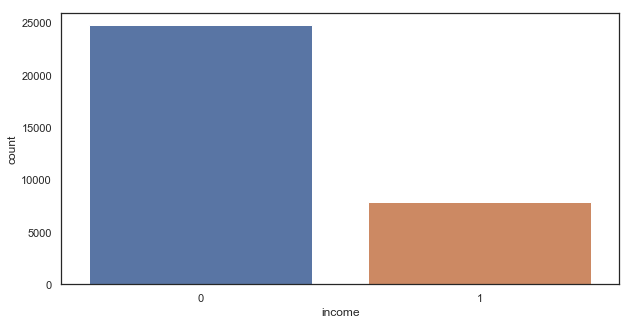

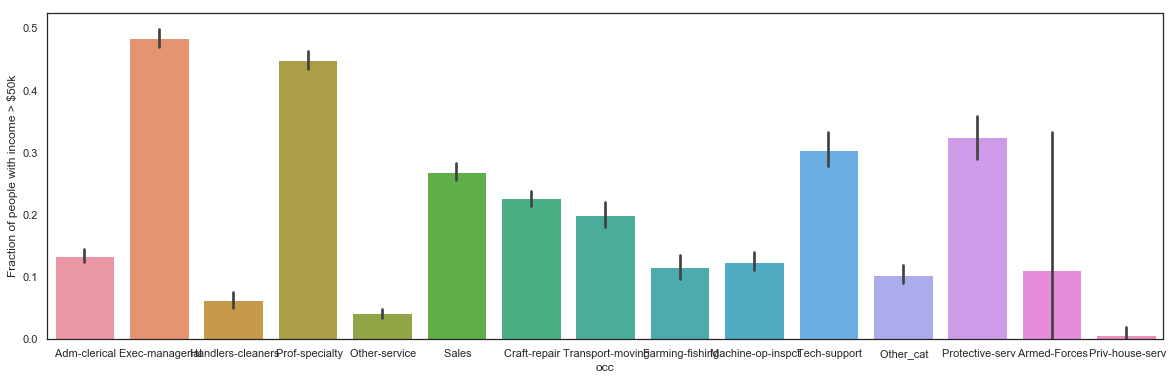

In [48]:
# Take a look at the %age income distribution of the dataset
plt.figure(figsize=(10,5))
sns.countplot(df_YB5['income'])

# Bar plot of occ with 95% confidence interval of mean
plt.figure(figsize=(20,6))
ax=sns.barplot(x='occ', y='income', data=df_YB5)
ax.set(ylabel='Fraction of people with income > $50k')

We see that only less than 25% of population has income >50k.  Occupation vs. income really do not have a visible direct correlation. The Armed-Forces confidence interval is so wide, due to an extremely small number of samples.  

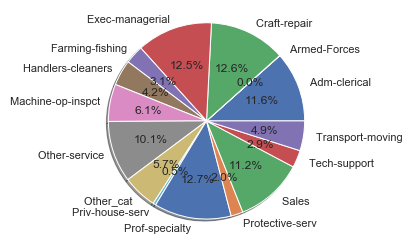

In [49]:
# pie chart to visualize occ value %age
labels = df_YB5['occ'].astype('category').cat.categories.tolist()
counts = df_YB5['occ'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [50]:
# confirming occ varible has no significant dominant value
df_YB6=df_YB5
df_YB6['occ'] = df_YB6['occ'].str.replace('Other-service','Other_cat')
df_YB6['occ'] = df_YB6['occ'].str.replace('Armed-Forces','Other_cat')
#print (df_YB6['occ'].value_counts())
#print (df_YB6['country_orig'].value_counts())
print (df_YB6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 20 columns):
age                 32561 non-null int64
employ_type         32561 non-null object
edu_years           32561 non-null int64
marital             32561 non-null object
occ                 32561 non-null object
relation            32561 non-null object
race                32561 non-null object
gender              32561 non-null object
hours_week          32561 non-null int64
country_orig        32561 non-null object
income              32561 non-null int64
outlier             32561 non-null bool
edu_ Bachelors      32561 non-null uint8
edu_ Doctorate      32561 non-null uint8
edu_ HS-grad        32561 non-null uint8
edu_ Masters        32561 non-null uint8
edu_ Prof-school    32561 non-null uint8
edu_ SomeCollege    32561 non-null uint8
<HS                 32561 non-null uint8
cap_gain-loss       32561 non-null int64
dtypes: bool(1), int64(5), object(7), uint8(7)
memory usage: 3.2+

Armed-Forces has an extremely small number of occurences, consider combining it with other-services and other-cat.

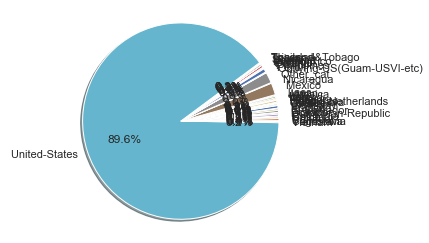

In [51]:
# pie chart to visualize native country value %age
labels = df_YB6['country_orig'].astype('category').cat.categories.tolist()
counts = df_YB6['country_orig'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [52]:
# checking number of peoples not from US
print(df_YB6['country_orig'].value_counts())
not_from_US = np.sum(df_YB6['country_orig']!=' United-States')
print(not_from_US, 'people are not from the United States')

 United-States                 29170
 Mexico                          643
 Other_cat                       583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

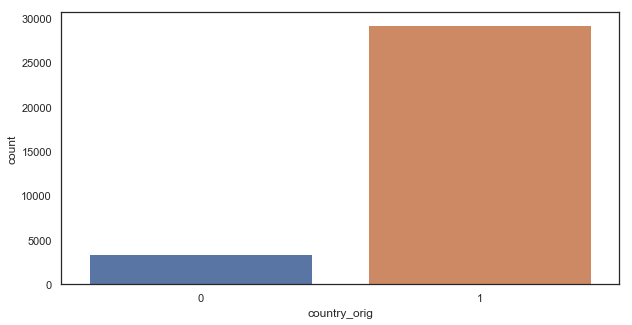

In [53]:
# ~10% people are not from US, combine all none US into a single value, code native country into binary 1=United-States
df_YB7=df_YB6
#df_YB7['country_orig'] = (df_YB7['country_orig']=='United-States')*1
df_YB7['country_orig'] = df_YB7['country_orig'].apply(lambda inc: 1 if inc ==" United-States" else 0) 
# checking  the result
plt.figure(figsize=(10,5))
sns.countplot(df_YB7['country_orig'])

If we take a step back to look at the population that we try to collect information to predict if their income is greater than 50k. There are other significant factor (features/variables) can contribute to the target prediction. For example, field of study, if one graduate college with liberal art degree vs. a computer science degree; another example maybe crimial records. 